#**스마트폰 센서 데이터 기반 모션 분류**
# 단계1 : 탐색적 데이터 분석

## 0.미션

### (1) 미션①
수많은 feature들을 모두 살펴보는 것은 과도한 시간과 노력이 필요합니다. 그래서 여러분은 **선택과 집중**을 해야 합니다.
* 1) **기본 모델을 생성**한 후 **변수 중요도**를 구합니다.   
    * random forest 알고리즘 사용을 권장합니다.
* 2) **중요한 feature와 중요하지 않은 feature 상위 N개를 선정**하고, 이들을 대상으로 EDA 수행.
* 3) **각 feature 그룹별 중요도**도 파악해보며 EDA를 수행  
    * Feature 이름에는 계층구조를 담고 있습니다. 그렇다 보니 feature들을 적절하게 그룹으로 묶을 수 있습니다.
    * 참고로, feature 그룹의 중요도는 개별 feature 중요도의 합으로 계산할 수 있습니다.


### (2) 미션②  
다음의 case에 맞게 feature 및 feature 그룹 중요도를 기반으로 탐색적 데이터 분석을 수행하시오.
* 1) Target을 **정적/동적 행동**으로 구분
    * 6개의 행동은 2개의 그룹(정적행동, 동적행동)으로 나뉩니다.  
    * 어떤 feature(혹은 feature 그룹)이 2개 class 그룹(정적행동, 동적행동)를 구분하는데 중요한지를 찾아보고 탐색해봅시다.
* 2) Target을 **개별 행동 여부**로 구분
    * 6가지의 행동을 분류하는 분석도 중요하지만, 개별 행동에만 특별히 영향을 받는 feature들도 있습니다.
    * 예를 들어, 계단을 오르는 행동(Walking_upstairs)과 관련이 큰 feature가 있을 것입니다. [계단을 오르는 행동]인지 아닌지로 구분하는 target을 추가하여 EDA를 수행해 봅시다.


## 1.환경설정

### (1) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 필요하다고 판단되는 라이브러리를 추가하세요.





* 변수 중요도 함수 생성
    * 변수 중요도를 시각화할 수 있는 함수를 제공합니다.
    * 입력 :
        * importance : 트리모델의 변수 중요도(예: model.feature_importances_)
        * names : 변수 이름 목록(예 : x_train.columns
        * result_only  : 변수 중요도 순으로 데이터프레임만 return할지, 그래프도 포함할지 결정. False이면 결과 데이터프레임 + 그래프
        * topn : 중요도 상위 n개만 표시. all 이면 전체.
    * 출력 :
        * 중요도 그래프 : 중요도 내림차순으로 정렬
        * 중요도 데이터프레임 : 중요도 내림차순으로 정렬

### (2) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용 데이터셋
    * feature.csv : feature 이름을 계층구조로 정리한 데이터  
 <br/>
    

* 세부 요구사항
    - 전체 데이터 'data01_train.csv' 를 불러와 'data' 변수에 저장합니다.
    - 센서 그룹 데이터 'feature.csv' 를 불러와 'features' 변수에 저장합니다.

In [5]:
data = pd.read_csv('/content/drive/MyDrive/KTaivle/3차미니프로젝트/data01_train.csv')

In [6]:
features = pd.read_csv('/content/drive/MyDrive/KTaivle/3차미니프로젝트/features.csv')

In [7]:
print(data.head())
print(features.head())

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288508          -0.009196          -0.103362         -0.988986   
1           0.265757          -0.016576          -0.098163         -0.989551   
2           0.278709          -0.014511          -0.108717         -0.997720   
3           0.289795          -0.035536          -0.150354         -0.231727   
4           0.394807           0.034098           0.091229          0.088489   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.962797         -0.967422         -0.989000         -0.962596   
1         -0.994636         -0.987435         -0.990189         -0.993870   
2         -0.981088         -0.994008         -0.997934         -0.982187   
3         -0.006412         -0.338117         -0.273557          0.014245   
4         -0.106636         -0.388502         -0.010469         -0.109680   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

## 2.데이터 분석 : 기본정보 살펴보기

### (1) 기본정보 확인하기


* **세부 요구사항**
    - 불러온 데이터의 형태, 기초통계량, 정보 등을 확인합니다.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 25.3+ MB


In [9]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.274811,-0.017799,-0.109396,-0.603138,-0.509815,-0.604058,-0.628151,-0.525944,-0.605374,-0.465490,...,-0.305883,-0.623548,0.008524,-0.001185,0.009340,-0.007099,-0.491501,0.059299,-0.054594,17.381568
std,0.067614,0.039422,0.058373,0.448807,0.501815,0.417319,0.424345,0.485115,0.413043,0.544995,...,0.322808,0.310371,0.339730,0.447197,0.608190,0.476738,0.509069,0.297340,0.278479,8.938316
min,-0.503823,-0.684893,-1.000000,-1.000000,-0.999844,-0.999667,-1.000000,-0.999419,-1.000000,-1.000000,...,-0.979261,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143,1.000000
25%,0.262919,-0.024877,-0.121051,-0.992774,-0.977680,-0.980127,-0.993602,-0.977865,-0.980112,-0.936067,...,-0.541969,-0.845985,-0.122361,-0.294369,-0.481718,-0.373345,-0.811397,-0.018203,-0.141555,8.000000
50%,0.277154,-0.017221,-0.108781,-0.943933,-0.844575,-0.856352,-0.948501,-0.849266,-0.849896,-0.878729,...,-0.342923,-0.712677,0.010278,0.005146,0.011448,-0.000847,-0.709441,0.182893,0.003951,19.000000
75%,0.288526,-0.010920,-0.098163,-0.242130,-0.034499,-0.262690,-0.291138,-0.068857,-0.268539,-0.013690,...,-0.127371,-0.501158,0.154985,0.285030,0.499857,0.356236,-0.511330,0.248435,0.111932,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,0.977344,0.478157,1.000000,30.000000


In [16]:
pd.set_option('display.max_rows', 10) # None으로 하면 모든 데이터가 출력됨

In [17]:
nan_count_by_column = data.isna().sum(axis=0)

print("각 열별 NaN 값의 개수:")
print(nan_count_by_column)

각 열별 NaN 값의 개수:
tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


### (2) 목표 변수 확인하기

* **세부 요구사항**
    - target인 'Activity'에 대해 단변량 분석을 수행합니다.
    - 범주의 종류, 범주별 빈도수 및 비율 등

In [24]:
activity_categories = data['Activity'].unique()

print("Activity의 범주 종류:")
print(activity_categories)

Activity의 범주 종류:
['STANDING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS' 'WALKING_UPSTAIRS'
 'SITTING']


In [25]:
activity_counts = data['Activity'].value_counts()

print("각 범주별 빈도수:")
print(activity_counts)
print()

각 범주별 빈도수:
LAYING                1115
STANDING              1087
SITTING               1032
WALKING                998
WALKING_UPSTAIRS       858
WALKING_DOWNSTAIRS     791
Name: Activity, dtype: int64



In [26]:
activity_ratios = data['Activity'].value_counts(normalize=True)

print("각 범주별 비율:")
print(activity_ratios)

각 범주별 비율:
LAYING                0.189594
STANDING              0.184833
SITTING               0.175480
WALKING               0.169699
WALKING_UPSTAIRS      0.145894
WALKING_DOWNSTAIRS    0.134501
Name: Activity, dtype: float64


### (3) 센서 그룹 데이터: features

* **세부 요구사항**
    - feature 이름에 대한 계층 구조별로 변수의 수를 카운트 해 봅시다.
        - sensor 별 변수의 개수
        - agg(regation) 별 변수의 개수
        - axis 별 변수의 개수

In [28]:
features

,sensor,agg,axis,feature_name
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z
3,tBodyAcc,std(),X,tBodyAcc-std()-X
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y
...,...,...,...,...
556,angle,tBodyGyroMean,gravityMean,"angle(tBodyGyroMean,gravityMean)"
557,angle,tBodyGyroJerkMean,gravityMean,"angle(tBodyGyroJerkMean,gravityMean)"
558,angle,X,gravityMean,"angle(X,gravityMean)"
559,angle,Y,gravityMean,"angle(Y,gravityMean)"


In [30]:
features['feature_type'] = features['sensor'] + '-' + features['agg'] + '-' + features['axis']

# 각 계층 구조별 변수의 수를 카운트
feature_counts = features['feature_type'].value_counts()

print("각 계층 구조별 변수의 수:")
print(feature_counts)

각 계층 구조별 변수의 수:
fBodyGyro-bandsEnergy()-25,32    3
fBodyGyro-bandsEnergy()-33,48    3
fBodyGyro-bandsEnergy()-1,8      3
fBodyGyro-bandsEnergy()-9,16     3
fBodyGyro-bandsEnergy()-17,24    3
                                ..
tBodyGyro-energy()-Y             1
tBodyGyro-energy()-X             1
tBodyGyro-min()-Z                1
tBodyGyro-min()-Y                1
angle-Z-gravityMean              1
Name: feature_type, Length: 408, dtype: int64


## 3.데이터 분석 : 미션1

수많은 feature들을 모두 살펴보는 것은 과도한 시간과 노력이 필요합니다. 그래서 여러분은 **선택과 집중**을 해야 합니다.
* 1) **기본 모델을 생성**한 후 **변수 중요도**를 구합니다.   
    * random forest 알고리즘 사용을 권장합니다.
* 2) **중요한 feature와 중요하지 않은 feature 상위 N개를 선정**하고, 이들을 대상으로 EDA 수행.
* 3) **각 feature 그룹별 중요도**도 파악해보며 EDA를 수행  
    * Feature 이름에는 계층구조를 담고 있습니다. 그렇다 보니 feature들을 적절하게 그룹으로 묶을 수 있습니다.
    * 참고로, feature 그룹의 중요도는 개별 feature 중요도의 합으로 계산할 수 있습니다.

### (1) 기본모델링 + 변수중요도 추출

* **세부 요구사항**
    - 모델링을 위한 기본 전처리를 수행합니다.
        - 주어진 데이터에서는 x, y로 나누고 train과 validation 분할 수행
    - 트리기반 알고리즘을 이용하여 모델링을 합니다.
        - 랜덤포레스트 권장 : 랜덤포레스트는 튜닝 없이 하이퍼파리미터의 기본값로도 적절한 성능의 모델을 생성할 수 있습니다.
    - 변수 중요도 추출
        - 사용자정의함수로 생성한 plot_feature_importance 을 이용
        - 변수중요도 파악및 결과 저장

In [36]:
# 변수의 특성 중요도 계산하기
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = data.drop(columns=['Activity'])
y = data['Activity']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(x_train, y_train)

importance = rf_model.feature_importances_
names = x_train.columns

In [37]:
importance = rf_model.feature_importances_
names = x_train.columns

feature_importance_df = pd.DataFrame({'Feature': names, 'Importance': importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("변수 중요도 내림차순:")
print(feature_importance_df)

변수 중요도 내림차순:
                             Feature  Importance
40              tGravityAcc-mean()-X    0.033213
50               tGravityAcc-max()-Y    0.029725
49               tGravityAcc-max()-X    0.026256
52               tGravityAcc-min()-X    0.025537
558             angle(X,gravityMean)    0.024184
..                               ...         ...
480  fBodyGyro-bandsEnergy()-49,56.1    0.000102
288             fBodyAcc-entropy()-Y    0.000101
237       tBodyAccJerkMag-arCoeff()3    0.000075
367         fBodyAccJerk-entropy()-Y    0.000062
229            tBodyAccJerkMag-max()    0.000037

[562 rows x 2 columns]


In [39]:
# 변수 중요도 그래프로 시각화하기, 변수가 너무 많은 까닭에 가독성이 떨어져서 주석 처리했음

# fi_df = plot_feature_importance(importance, names)
# print(fi_df)

### (2) 중요도 기반 feature 분석

* **세부 요구사항**
    - 상위 n, 하위 m 개의 변수를 선정
    - 선정된 변수(feature)와 target 간의 관계를 kdeplot으로 그리기

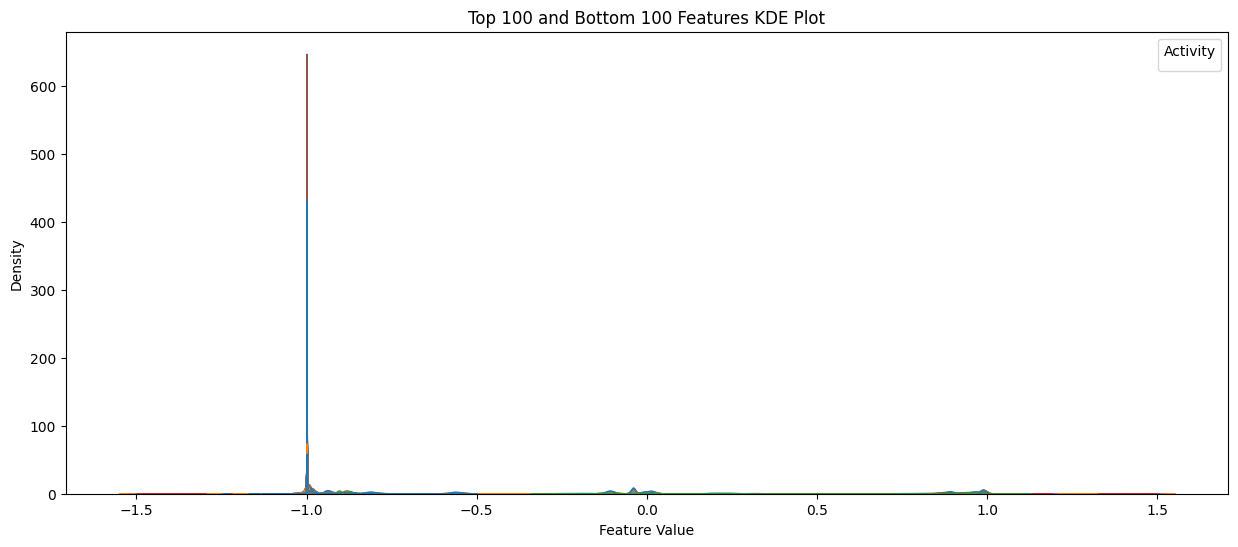

In [40]:
import seaborn as sns

n_top = 100
m_bottom = 100

top_features = feature_importance_df.head(n_top)['Feature']
bottom_features = feature_importance_df.tail(m_bottom)['Feature']

plt.figure(figsize=(15, 6))

for feature in top_features:
    sns.kdeplot(data=data, x=feature, hue='Activity', fill=True, alpha=0.5)

for feature in bottom_features:
    sns.kdeplot(data=data, x=feature, hue='Activity', fill=True, alpha=0.5)

plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.title('Top {} and Bottom {} Features KDE Plot'.format(n_top, m_bottom))
plt.legend(title='Activity')
plt.show()


### (3) feature 그룹별 분석

* **세부 요구사항**
    - 제공된 features.csv 에는 feature에 대한 계층구조를 정리해 놓았습니다.
    - features와 변수중요도 결과를 merge 하시오.
    - sensor 별 중요도 합계를 구하고 상위 변수 그룹별 비교 분석을 수행 하시오.
    - sensor + agg 별 중요도 합계를 구하고 상위 변수 그룹별 비교 분석을 수행 하시오.


In [45]:
feature_importance_df.rename(columns={'Feature': 'feature_name'}, inplace=True)

merged_df = pd.merge(features, feature_importance_df, on='feature_name', how='inner')

print(merged_df)

       sensor                agg         axis  \
0    tBodyAcc             mean()            X   
1    tBodyAcc             mean()            Y   
2    tBodyAcc             mean()            Z   
3    tBodyAcc              std()            X   
4    tBodyAcc              std()            Y   
..        ...                ...          ...   
556     angle      tBodyGyroMean  gravityMean   
557     angle  tBodyGyroJerkMean  gravityMean   
558     angle                  X  gravityMean   
559     angle                  Y  gravityMean   
560     angle                  Z  gravityMean   

                             feature_name  \
0                       tBodyAcc-mean()-X   
1                       tBodyAcc-mean()-Y   
2                       tBodyAcc-mean()-Z   
3                        tBodyAcc-std()-X   
4                        tBodyAcc-std()-Y   
..                                    ...   
556      angle(tBodyGyroMean,gravityMean)   
557  angle(tBodyGyroJerkMean,gravityMean)   
558   

In [49]:
sensor_importance_sum = merged_df.groupby('sensor')['Importance'].sum().reset_index()

top_sensor_groups = sensor_importance_sum.sort_values(by='Importance', ascending=False).head(10)['sensor']

merged_df['sensor-agg'] = merged_df['sensor'] + '-' + merged_df['agg']
sensor_agg_importance_sum = merged_df.groupby('sensor-agg')['Importance'].sum().reset_index()

top_sensor_agg_groups = sensor_agg_importance_sum.sort_values(by='Importance', ascending=False).head(10)['sensor-agg']

In [54]:
print("sensor 별 중요도 합계:")
print(sensor_importance_sum)
print("\nTop 10 sensor 그룹:")
print(top_sensor_groups)
print("\n")
print("sensor + agg 별 중요도 합계:")
print(sensor_agg_importance_sum)
print("\nTop 10 sensor-agg 그룹:")
print(top_sensor_agg_groups)

sensor 별 중요도 합계:
                 sensor  Importance
0                 angle    0.061880
1              fBodyAcc    0.089308
2          fBodyAccJerk    0.086659
3           fBodyAccMag    0.045020
4   fBodyBodyAccJerkMag    0.015203
..                  ...         ...
13        tBodyGyroJerk    0.039455
14     tBodyGyroJerkMag    0.009766
15         tBodyGyroMag    0.005501
16          tGravityAcc    0.336072
17       tGravityAccMag    0.033511

[18 rows x 2 columns]

Top 10 sensor 그룹:
16      tGravityAcc
1          fBodyAcc
2      fBodyAccJerk
7         fBodyGyro
9      tBodyAccJerk
0             angle
3       fBodyAccMag
8          tBodyAcc
13    tBodyGyroJerk
12        tBodyGyro
Name: sensor, dtype: object


sensor + agg 별 중요도 합계:
                 sensor-agg  Importance
0                   angle-X    0.024184
1                   angle-Y    0.024119
2                   angle-Z    0.012210
3    angle-tBodyAccJerkMean    0.000170
4        angle-tBodyAccMean    0.000130
..              

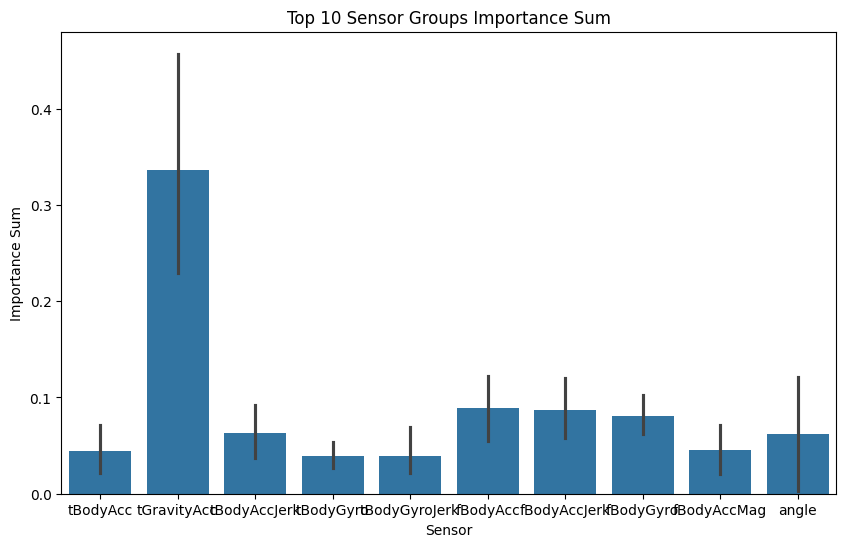

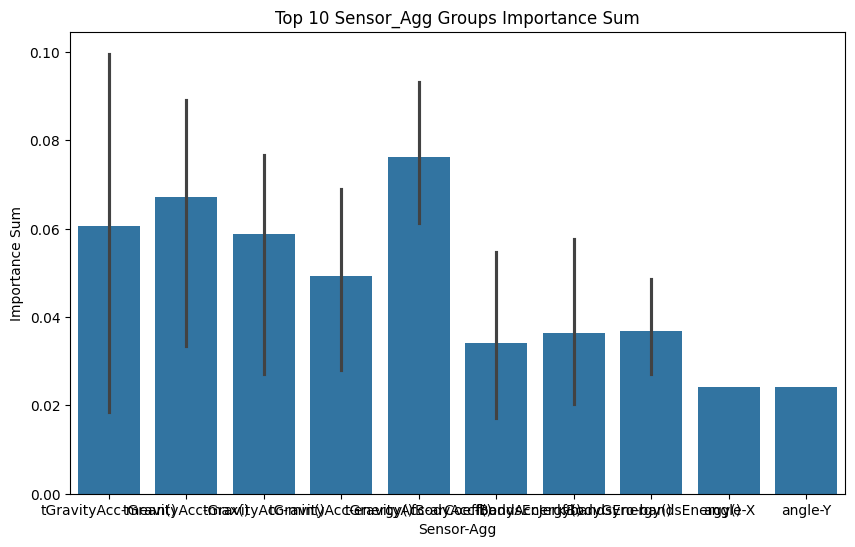

In [53]:
top_sensor_df = merged_df[merged_df['sensor'].isin(top_sensor_groups)]
top_sensor_agg_df = merged_df[merged_df['sensor-agg'].isin(top_sensor_agg_groups)]

plt.figure(figsize=(10, 6))
sns.barplot(data=top_sensor_df, x='sensor', y='Importance', estimator=sum)
plt.title('Top 10 Sensor Groups Importance Sum')
plt.xlabel('Sensor')
plt.ylabel('Importance Sum')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_sensor_agg_df, x='sensor-agg', y='Importance', estimator=sum)
plt.title('Top 10 Sensor-Agg Groups Importance Sum')
plt.xlabel('Sensor-Agg')
plt.ylabel('Importance Sum')
plt.show()

## 4.데이터 분석 : 미션2

다음의 case에 맞게 feature 및 feature 그룹 중요도를 기반으로 탐색적 데이터 분석을 수행하시오.
* 1) Target을 **정적/동적 행동**으로 구분
    * 6개의 행동은 2개의 그룹(정적행동, 동적행동)으로 나뉩니다.  
    * 어떤 feature(혹은 feature 그룹)이 2개 class 그룹(정적행동, 동적행동)를 구분하는데 중요한지를 찾아보고 탐색해봅시다.
* 2) Target을 **개별 행동 여부**로 구분
    * 6가지의 행동을 분류하는 분석도 중요하지만, 개별 행동에만 특별히 영향을 받는 feature들도 있습니다.
    * 예를 들어, 계단을 오르는 행동(Walking_upstairs)과 관련이 큰 feature가 있을 것입니다. [계단을 오르는 행동]인지 아닌지로 구분하는 target을 추가하여 EDA를 수행해 봅시다.

### (1) 정적/동적 행동으로 구분하여 분석하기

* **세부 요구사항**
    - Target인 Activity를 is_dynamic 변수로 변경하시오.
        * 값 0 : STANDING, SITTING, LAYING
        * 값 1 : WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS
    - is_dynamic을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_dynamic을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_dynamic 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_dynamic 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


#### 1) is_dynamic 추가

In [58]:
data['is_dynamic'] = data['Activity'].isin(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']).astype(int)

print(data['is_dynamic'])

0       0
1       0
2       0
3       1
4       1
       ..
5876    0
5877    1
5878    0
5879    1
5880    0
Name: is_dynamic, Length: 5881, dtype: int64


#### 2) 기본모델 생성

In [65]:
X = data.drop(columns=['is_dynamic', 'Activity'])
y = data['is_dynamic']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_valid)

accuracy = (y_pred == y_valid).mean()
print("Accuracy:", accuracy)

Accuracy: 1.0


#### 3) 변수중요도 상위 5개 분석

In [71]:
importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

top_5_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)
print("중요한 상위 변수 5개:")
print(top_5_features)

중요한 상위 변수 5개:
                      Feature  Importance
181     tBodyGyroJerk-iqr()-Z    0.059999
347      fBodyAccJerk-std()-X    0.049973
287      fBodyAcc-entropy()-X    0.049795
353      fBodyAccJerk-max()-X    0.040065
102  tBodyAccJerk-entropy()-X    0.039923


### (2) 개별 동작 분석 : is_standing


* **세부 요구사항**
    - Target인 Activity를 is_standing 변수로 변경하시오.
        * 값 1 : STANDING
        * 값 0 : 나머지
    - is_standing 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_standing 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_standing 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_standing 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


In [99]:
# standing_data = data라고 하면, data 객체를 가르키는 것이기 때문에 data에도 똑같은 column이 추가됨
standing_data = data.copy()
standing_data['is_standing'] = standing_data['Activity'].isin(['STANDING']).astype(int)

In [103]:
X = standing_data.drop(columns=['is_dynamic', 'Activity', 'is_standing'])
y = standing_data['is_standing']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_valid)

accuracy = (y_pred == y_valid).mean()
print("Accuracy:", accuracy)

Accuracy: 0.9872557349192863


In [104]:
importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

top_5_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)
print("중요한 상위 변수 5개:")
print(top_5_features)

중요한 상위 변수 5개:
                  Feature  Importance
50    tGravityAcc-max()-Y    0.066655
559  angle(Y,gravityMean)    0.063110
41   tGravityAcc-mean()-Y    0.047829
53    tGravityAcc-min()-Y    0.042679
560  angle(Z,gravityMean)    0.029686


### (3) 개별 동작 분석 : is_sitting


* **세부 요구사항**
    - Target인 Activity를 is_sitting 변수로 변경하시오.
        * 값 1 : SITTING
        * 값 0 : 나머지
    - is_sitting 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_sitting 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_sitting 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_sitting 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


In [106]:
sitting_data = data.copy()
sitting_data['is_sitting'] = data['Activity'].isin(['SITTING']).astype(int)

In [107]:
X = sitting_data.drop(columns=['is_dynamic', 'Activity', 'is_sitting'])
y = sitting_data['is_sitting']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_valid)

accuracy = (y_pred == y_valid).mean()
print("Accuracy:", accuracy)

Accuracy: 0.989804587935429


In [108]:
importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

top_5_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)
print("중요한 상위 변수 5개:")
print(top_5_features)

중요한 상위 변수 5개:
                  Feature  Importance
559  angle(Y,gravityMean)    0.051174
50    tGravityAcc-max()-Y    0.043982
53    tGravityAcc-min()-Y    0.041279
558  angle(X,gravityMean)    0.040435
41   tGravityAcc-mean()-Y    0.027529


### (4) 개별 동작 분석 : is_laying


* **세부 요구사항**
    - Target인 Activity를 is_laying 변수로 변경하시오.
        * 값 1 : LAYING
        * 값 0 : 나머지
    - is_laying 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_laying 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_laying 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_laying 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


In [111]:
laying_data = data.copy()
laying_data['is_laying'] = data['Activity'].isin(['LAYING']).astype(int)

In [112]:
X = laying_data.drop(columns=['is_dynamic', 'Activity', 'is_laying'])
y = laying_data['is_laying']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_valid)

accuracy = (y_pred == y_valid).mean()
print("Accuracy:", accuracy)

Accuracy: 1.0


In [113]:
importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

top_5_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)
print("중요한 상위 변수 5개:")
print(top_5_features)

중요한 상위 변수 5개:
                    Feature  Importance
40     tGravityAcc-mean()-X    0.108937
49      tGravityAcc-max()-X    0.104807
56   tGravityAcc-energy()-X    0.076181
558    angle(X,gravityMean)    0.065231
57   tGravityAcc-energy()-Y    0.064073


### (5) 개별 동작 분석 : is_walking


* **세부 요구사항**
    - Target인 Activity를 is_walking 변수로 변경하시오.
        * 값 1 : WALKING
        * 값 0 : 나머지
    - is_walking 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_walking 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_walking 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_walking 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


In [114]:
walking_data = data.copy()
walking_data['is_walking'] = data['Activity'].isin(['WALKING']).astype(int)

In [115]:
X = walking_data.drop(columns=['is_dynamic', 'Activity', 'is_walking'])
y = walking_data['is_walking']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_valid)

accuracy = (y_pred == y_valid).mean()
print("Accuracy:", accuracy)

Accuracy: 0.9966015293118097


In [116]:
importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

top_5_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)
print("중요한 상위 변수 5개:")
print(top_5_features)

중요한 상위 변수 5개:
                         Feature  Importance
503            fBodyAccMag-std()    0.032203
310  fBodyAcc-bandsEnergy()-1,16    0.021938
274             fBodyAcc-max()-X    0.020874
37    tBodyAcc-correlation()-X,Y    0.020669
66     tGravityAcc-arCoeff()-X,2    0.019141


### (6) 개별 동작 분석 : is_walking_up


* **세부 요구사항**
    - Target인 Activity를 is_walking_up 변수로 변경하시오.
        * 값 1 : WALKING_UPSTAIRS
        * 값 0 : 나머지
    - is_walking_up 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_walking_up 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_walking_up 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_walking_up 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


In [117]:
walking_up_data = data.copy()
walking_up_data['is_walking_up'] = data['Activity'].isin(['WALKING_UPSTAIRS']).astype(int)

In [118]:
X = walking_up_data.drop(columns=['is_dynamic', 'Activity', 'is_walking_up'])
y = walking_up_data['is_walking_up']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_valid)

accuracy = (y_pred == y_valid).mean()
print("Accuracy:", accuracy)

Accuracy: 0.9974511469838573


In [119]:
importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

top_5_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)
print("중요한 상위 변수 5개:")
print(top_5_features)

중요한 상위 변수 5개:
                       Feature  Importance
53         tGravityAcc-min()-Y    0.033113
74   tGravityAcc-arCoeff()-Z,2    0.026411
75   tGravityAcc-arCoeff()-Z,3    0.025354
450        fBodyGyro-maxInds-Z    0.025266
73   tGravityAcc-arCoeff()-Z,1    0.023002


### (7) 개별 동작 분석 : is_walking_down


* **세부 요구사항**
    - Target인 Activity를 is_walking_down 변수로 변경하시오.
        * 값 1 : WALKING_DOWNSTAIRS
        * 값 0 : 나머지
    - is_walking_down 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_walking_down 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_walking_down 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_walking_down 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


In [125]:
walking_down_data = data.copy()
walking_down_data['is_walking_down'] = data['Activity'].isin(['WALKING_DOWNSTAIRS']).astype(int)

In [126]:
X = walking_down_data.drop(columns=['is_dynamic', 'Activity', 'is_walking_down'])
y = walking_down_data['is_walking_down']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_valid)

accuracy = (y_pred == y_valid).mean()
print("Accuracy:", accuracy)

Accuracy: 0.9889549702633815


In [127]:
importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

top_5_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)
print("중요한 상위 변수 5개:")
print(top_5_features)

중요한 상위 변수 5개:
                  Feature  Importance
201     tBodyAccMag-std()    0.090652
214  tGravityAccMag-std()    0.054868
202     tBodyAccMag-mad()    0.043855
508  fBodyAccMag-energy()    0.037850
215  tGravityAccMag-mad()    0.035167


## 5.특성 중요도 저장하기

* **세부 요구사항**
    - 지금까지 변수 중요도를 다양한 관점에서 뽑고 분석을 해 보았습니다.
        - 관점1 : 6개 행동 구분
        - 관점2 : 동적, 정적 행동 구분
        - 관점3 : Standing 여부 구분
        - 관점4 : Sitting 여부 구분
        - 관점5 : Laying 여부 구분
        - 관점6 : Walking 여부 구분
        - 관점7 : Walking_upstairs 여부 구분
        - 관점8 : Walking_downstairs 여부 구분
    - 모든 관점의 변수 중요도를 하나로 합친 후 저장
        - merge를 이용하여 features와 합칩니다.
        - joblib 패키지의 dump를 이용하여 결과를 저장합니다.

### (1) 하나로 합치기
* 합치기 위해서는 중요도 결과에서 feature_importance 칼럼 이름을 수정해야 합니다.
* pd.merge를 이용해서 하나씩 합치는 작업을 반복 합니다.

In [128]:
features

,sensor,agg,axis,feature_name,feature_type
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,tBodyAcc-mean()-X
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,tBodyAcc-mean()-Y
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z,tBodyAcc-mean()-Z
3,tBodyAcc,std(),X,tBodyAcc-std()-X,tBodyAcc-std()-X
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y,tBodyAcc-std()-Y
...,...,...,...,...,...
556,angle,tBodyGyroMean,gravityMean,"angle(tBodyGyroMean,gravityMean)",angle-tBodyGyroMean-gravityMean
557,angle,tBodyGyroJerkMean,gravityMean,"angle(tBodyGyroJerkMean,gravityMean)",angle-tBodyGyroJerkMean-gravityMean
558,angle,X,gravityMean,"angle(X,gravityMean)",angle-X-gravityMean
559,angle,Y,gravityMean,"angle(Y,gravityMean)",angle-Y-gravityMean


In [129]:
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,is_dynamic
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING,0
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING,0
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING,0
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING,1
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.277194,-0.012389,-0.131974,-0.994046,-0.940578,-0.917337,-0.994261,-0.932830,-0.908088,-0.936219,...,-0.034888,-0.261437,-0.391477,-0.877612,-0.912365,0.114009,0.080146,21,SITTING,0
5877,0.191568,0.013328,-0.105174,-0.126969,-0.121729,-0.327480,-0.192523,-0.109923,-0.295286,0.078644,...,0.721718,0.623151,0.866858,-0.445660,-0.690278,0.303194,-0.044188,15,WALKING_UPSTAIRS,1
5878,0.267981,-0.018348,-0.107440,-0.991303,-0.989881,-0.990313,-0.992386,-0.988852,-0.991237,-0.936099,...,0.060173,0.228739,0.684400,-0.216665,0.620363,-0.437247,-0.571840,19,LAYING,0
5879,0.212787,-0.048130,-0.121001,-0.041373,0.052449,-0.585361,-0.100714,0.023353,-0.554707,0.219814,...,0.260880,0.551742,-0.943773,-0.862899,-0.718009,0.292856,0.024920,6,WALKING_UPSTAIRS,1


### (2) 저장하기
* joblib.dump를 이용하시오.
* 저장할 파일의 확장자는 보통 .pkl 입니다.